# EXECUTIVE SUMMARY

The dataset, originally compiled in CSV format, is composed of electronic records spanning ten years (1999 through 2008) with various demographic and clinical variables per patient. The  dataset can be summarised very briefly as follows: each row corresponds to a hospital visit, id, gender, visits, medications, weight. The age and gender were categorical variables, with the age describing intervals measured in years (e.g., [0, 10), [10, 20), [20, 30), etc.).   

The ages were replaced with a number e.g  0-10 with 10, as (0-10) wasn't specific
The data had no missing values nor duplicated values, except for the weight column that contained just ?, which didnt depict the weight of the patients. However, certain columns were dropped.

Each row includes also 24 features associated to different medications against diabetes, each one indicating if the drug, or a change in its dosage, was prescribed. The possible values for all these 24 columns are ‘NO’ (not prescribed), ‘Steady’ (no change in dosage), ‘Up’ (increased dosage) and ‘Down’ (decreased dosage). The LABEL indicates if the patient was readmitted after the visit and its possible values are ‘NO’ (i.e., no readmission), ‘<30’ (i.e. readmission occurred within 30 days) ‘>30’ (i.e., readmission occurred after 30 days). Prior to training the models proposed in this project, this dataset was pre-processed. Numerical features were kept intact whereas categorical variables were mapped to numerical representations. This way the problem was replaced with a binary dummy variable, binary classification(0,1). After this, prediction models with
logistic regression (LR) and KNN(K Nearest Neighbors) were trained on the selected features. The models were implemented using the library scikit-learn.  During experimentation the Logistic Regression model was observed to exhibit the best predictive and
computational performance. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## INTRODUCTION
Diabetes- a chronic (long-lasting) health condition that affects all age group due to an inability  of the pancreas not producing enough insulin or when the body cannot effectively use the insulin it produces how your body turns food into energy.

Insulin is a hormone that regulates blood glucose. Hyperglycaemia, also called raised blood glucose or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [7]:
df.duplicated().sum()

0

In [8]:
 df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
df.shape

(101766, 50)

In [10]:
df.groupby(['readmitted']).size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

<AxesSubplot:xlabel='time_in_hospital', ylabel='Count'>

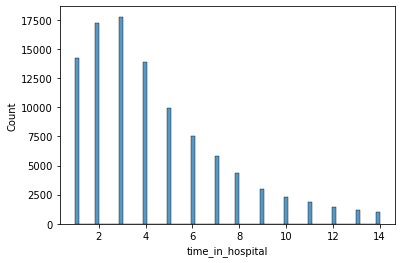

In [11]:
sns.histplot(x ="time_in_hospital", data =df)

<AxesSubplot:xlabel='readmitted', ylabel='Count'>

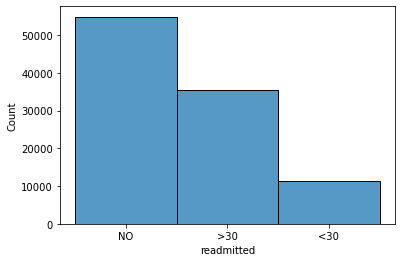

In [12]:
sns.histplot(x ="readmitted", data =df)

In [13]:
df.groupby(['insulin']).size

insulin
Down      12218
No        47383
Steady    30849
Up        11316
dtype: int64

In [28]:
df[df[gender!="Female"]]

NameError: name 'gender' is not defined

In [14]:
df.replace({'[0-10)': 10, '[10-20)': 20, '[20-30)':30, '[30-40)':40, '[40-50)':50, '[50-60)':60,
       '[60-70)':70, '[70-80)':80, '[80-90)':90, '[90-100)':100
    
}, inplace = True)

## PROBLEM DEFINITION
 Hospital readmissions within 30 days are a health care quality metric, given their associated costs both to the patient
and the clinical institution, and thus are one indicator of inefficiency in the healthcare system.

Diabetes is a challenge because the number of people living with diabetes is expected to grow year after year, there isn’t a cure yet for diabetes, but losing weight, eating healthy food, and most importantly controlling INSULIN can really help.
 
The data provided was gotten from Kaggle in csv format(comma separated values and can be broadly divided into numerical and categorical.

The data was cleaned, described and filtered for proper use. The models option that could be used in solving this diabetic data includes Logistic regression, Support Vector Machines, Gaussian Naive Bayes,  Neural Networks and Random Forests. The models were trained and evaluated over a publicly available dataset comprising patient data from a hospital network in the United States collected over the course of eight years.

I chose Logistic Regression because It uses probabilistic estimations which helps in understanding the relationship between the dependent variable(y) and one or more independent variables(X). This model, logistic regression has been widely adopted in clinical applications due to its interpretability and relatively high accuracy.

Hence, the problem definition is to predict, develop a model to predict the high-risk diabetic-patients who are most likely to get readmitted within 30 days.

In [15]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,10,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,20,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,30,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,40,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,50,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,80,?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,90,?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,80,?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,90,?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [16]:
df.groupby(['age']).size()

age
10       161
20       691
30      1657
40      3775
50      9685
60     17256
70     22483
80     26068
90     17197
100     2793
dtype: int64

In [17]:
df.drop(df.columns[[0,1,2,5,6,7,8,10,11,15,17, 18,19,20,21,22,23,24,25,26,27,28,29,30,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46]], axis = 1, inplace = True)

In [18]:
df

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted
0,Female,10,1,41,0,1,0,No,No,No,NO
1,Female,20,3,59,0,18,0,Up,Ch,Yes,>30
2,Female,30,2,11,5,13,0,No,No,Yes,NO
3,Male,40,2,44,1,16,0,Up,Ch,Yes,NO
4,Male,50,1,51,0,8,0,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...
101761,Male,80,3,51,0,16,0,Down,Ch,Yes,>30
101762,Female,90,5,33,3,18,0,Steady,No,Yes,NO
101763,Male,80,1,53,0,9,0,Down,Ch,Yes,NO
101764,Female,90,10,45,2,21,0,Up,Ch,Yes,NO


In [23]:
df_largest = df.nlargest(10,'age')
df_largest

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted
9,Female,100,12,33,3,18,0,Steady,Ch,Yes,NO
65,Female,100,8,43,3,18,0,Steady,No,Yes,>30
134,Female,100,7,35,2,11,0,No,No,No,NO
144,Female,100,11,70,1,23,0,No,No,No,NO
346,Female,100,1,33,0,5,0,No,No,No,>30
555,Male,100,4,45,0,7,0,No,No,No,NO
598,Female,100,7,34,0,17,0,No,No,No,NO
653,Female,100,1,68,1,2,0,Steady,No,Yes,NO
682,Female,100,5,61,3,12,0,No,No,No,>30
821,Female,100,8,36,6,18,0,No,No,No,>30


In [ ]:
sns.histplot(x ="readmitted", data =df)

<AxesSubplot:xlabel='gender', ylabel='Count'>

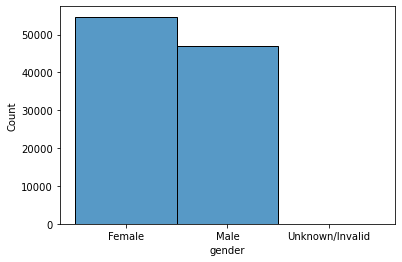

In [19]:
sns.histplot(x ="gender", data =df)

<AxesSubplot:xlabel='insulin', ylabel='count'>

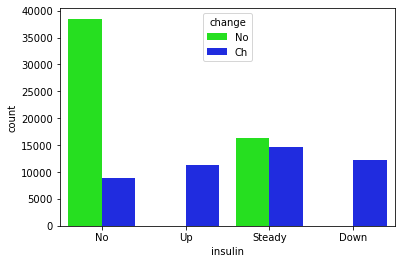

In [20]:
sns.countplot(x= "insulin", hue ="change", data = df, color ="blue", palette ="hsv")

<AxesSubplot:xlabel='time_in_hospital', ylabel='count'>

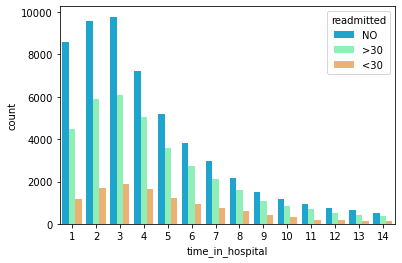

In [21]:
sns.countplot(x= "time_in_hospital", hue ="readmitted", data = df, color ="black", palette="rainbow")

<AxesSubplot:xlabel='time_in_hospital', ylabel='Count'>

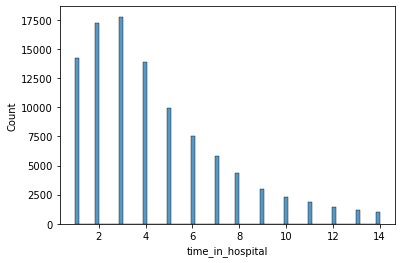

In [22]:
sns.histplot(x ="time_in_hospital", data =df)

<AxesSubplot:xlabel='readmitted', ylabel='count'>

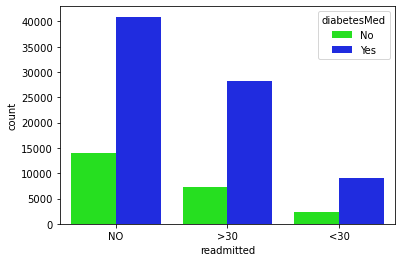

In [23]:
sns.countplot(x= "readmitted", hue ="diabetesMed", data = df, palette ="hsv", color ="lightblue")

<AxesSubplot:xlabel='age', ylabel='count'>

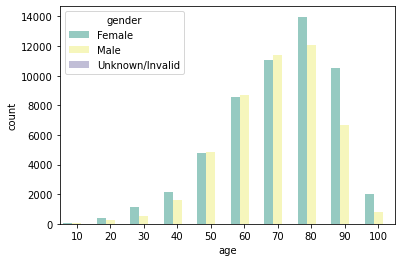

In [24]:
sns.countplot(x="age", hue="gender",
                 data=df, palette="Set3", color ="blue")

<AxesSubplot:xlabel='time_in_hospital', ylabel='count'>

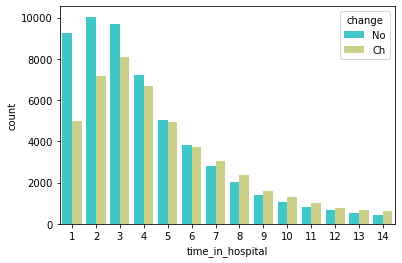

In [25]:
sns.countplot(x= "time_in_hospital", hue ="change", data = df, color ="black", palette="rainbow")

<AxesSubplot:xlabel='readmitted', ylabel='count'>

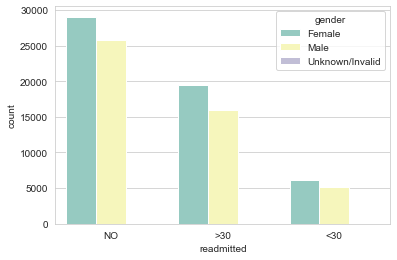

In [26]:
sns.set_style('whitegrid')
sns.countplot(x="readmitted", hue="gender",
                 data=df, palette="Set3", color ="blue")

In [27]:
df['gender'] = df['gender'].replace({"Unknown/Invalid":"Female"}, inplace = True)

In [28]:
df

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted
0,None,10,1,41,0,1,0,No,No,No,NO
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30
2,None,30,2,11,5,13,0,No,No,Yes,NO
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO


## MODELS
Supervised learning is a ML learning method that uses labeled data to help the machine learn, under SL, we have Classification-Binary Classification that focuseson discrete values
1)Logistic Regression is a classification algorithm used to predict outcomes for a giiven set of independent variables. The dependent variable's outcome is dscrete.a dataset with one or more independent variables, used to determine binary output of the dependent variable
2)KNN-KNN is based on feature similarity, K Nearest Neighbors is  one of the Suupervised Machine Learning Algorithm mostly used for classification, KNN stores all available cases and classifies new cases based on a similarity measure, K is  isa parameter that refers to the number of nearest neighbors to include in the process. We can use KNN when datas are labeled(age, gender), when data is noise free

In [29]:
dummies1 = pd.get_dummies(df['change'])
dummies2 = pd.get_dummies(df['diabetesMed'])
dummies3 = pd.get_dummies(df['readmitted'])
dummies4 = pd.get_dummies(df['insulin'])
dummies5 =  pd.get_dummies(df['gender'])

In [30]:
merged =pd.concat([df,dummies1], axis = 1)
merged

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,No
0,None,10,1,41,0,1,0,No,No,No,NO,0,1
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,0
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,1
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,0
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,0
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,1
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,0
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,0


In [31]:
merged.drop(columns=["No"], inplace = True)
merged

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch
0,None,10,1,41,0,1,0,No,No,No,NO,0
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1
2,None,30,2,11,5,13,0,No,No,Yes,NO,0
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1


In [32]:
merged2 =pd.concat([merged,dummies2], axis = 1)
merged2

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,No,Yes
0,None,10,1,41,0,1,0,No,No,No,NO,0,1,0
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,0,1
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,0,1
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,0,1
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,0,1
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,0,1
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,0,1
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,0,1


In [33]:
merged2.drop(columns=["No"], inplace = True)

In [34]:
merged2

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,Yes
0,None,10,1,41,0,1,0,No,No,No,NO,0,0
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,1
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,1
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,1
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,1
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,1
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,1
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,1


In [35]:
merged3 =pd.concat([merged2,dummies3], axis = 1)
merged3

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,Yes,<30,>30,NO
0,None,10,1,41,0,1,0,No,No,No,NO,0,0,0,0,1
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,1,0,1,0
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,1,0,0,1
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,1,0,0,1
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,1,0,1,0
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,1,0,0,1
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,1,0,0,1
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,1,0,0,1


In [36]:
merged3.drop(columns=['>30','NO'], inplace = True)
merged3

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,Yes,<30
0,None,10,1,41,0,1,0,No,No,No,NO,0,0,0
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,1,0
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,1,0
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,1,0
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,1,0
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,1,0
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,1,0
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,1,0


In [37]:
merged4 =pd.concat([merged3,dummies4], axis = 1)
merged4

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,Yes,<30,Down,No,Steady,Up
0,None,10,1,41,0,1,0,No,No,No,NO,0,0,0,0,1,0,0
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,1,0,0,0,0,1
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,1,0,0,1,0,0
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,1,0,0,0,0,1
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,1,0,1,0,0,0
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,1,0,0,0,1,0
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,1,0,1,0,0,0
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,1,0,0,0,0,1


In [38]:
merged4.drop(columns=["No", "Down", "Steady"], inplace = True)
merged4

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,Yes,<30,Up
0,None,10,1,41,0,1,0,No,No,No,NO,0,0,0,0
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,1,0,1
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,1,0,0
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,1,0,1
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,1,0,0
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,1,0,0
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,1,0,0
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,1,0,1


In [39]:
total_merged = pd.concat([merged4,dummies5], axis = 1)
total_merged

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,insulin,change,diabetesMed,readmitted,Ch,Yes,<30,Up
0,None,10,1,41,0,1,0,No,No,No,NO,0,0,0,0
1,None,20,3,59,0,18,0,Up,Ch,Yes,>30,1,1,0,1
2,None,30,2,11,5,13,0,No,No,Yes,NO,0,1,0,0
3,None,40,2,44,1,16,0,Up,Ch,Yes,NO,1,1,0,1
4,None,50,1,51,0,8,0,Steady,Ch,Yes,NO,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,Down,Ch,Yes,>30,1,1,0,0
101762,None,90,5,33,3,18,0,Steady,No,Yes,NO,0,1,0,0
101763,None,80,1,53,0,9,0,Down,Ch,Yes,NO,1,1,0,0
101764,None,90,10,45,2,21,0,Up,Ch,Yes,NO,1,1,0,1


In [40]:
total_merged.drop(columns=['change', 'diabetesMed', 'readmitted', 'insulin'], inplace = True)
total_merged

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,Ch,Yes,<30,Up
0,None,10,1,41,0,1,0,0,0,0,0
1,None,20,3,59,0,18,0,1,1,0,1
2,None,30,2,11,5,13,0,0,1,0,0
3,None,40,2,44,1,16,0,1,1,0,1
4,None,50,1,51,0,8,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,1,1,0,0
101762,None,90,5,33,3,18,0,0,1,0,0
101763,None,80,1,53,0,9,0,1,1,0,0
101764,None,90,10,45,2,21,0,1,1,0,1


In [41]:
total_merged.rename(columns={"Ch": "Change","Yes": "diabetesMed", "<30":"ReadmittedAfter30Days", "Up": "DosageIncreasedInsulin", "Male":"Malegender"}, inplace = True)

In [42]:
total_merged

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,Change,diabetesMed,ReadmittedAfter30Days,DosageIncreasedInsulin
0,None,10,1,41,0,1,0,0,0,0,0
1,None,20,3,59,0,18,0,1,1,0,1
2,None,30,2,11,5,13,0,0,1,0,0
3,None,40,2,44,1,16,0,1,1,0,1
4,None,50,1,51,0,8,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,1,1,0,0
101762,None,90,5,33,3,18,0,0,1,0,0
101763,None,80,1,53,0,9,0,1,1,0,0
101764,None,90,10,45,2,21,0,1,1,0,1


In [43]:

total_merged

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,Change,diabetesMed,ReadmittedAfter30Days,DosageIncreasedInsulin
0,None,10,1,41,0,1,0,0,0,0,0
1,None,20,3,59,0,18,0,1,1,0,1
2,None,30,2,11,5,13,0,0,1,0,0
3,None,40,2,44,1,16,0,1,1,0,1
4,None,50,1,51,0,8,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,None,80,3,51,0,16,0,1,1,0,0
101762,None,90,5,33,3,18,0,0,1,0,0
101763,None,80,1,53,0,9,0,1,1,0,0
101764,None,90,10,45,2,21,0,1,1,0,1


In [44]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X= total_merged.drop(columns=["ReadmittedAfter30Days", "gender"])
y = total_merged[["ReadmittedAfter30Days"]]

In [46]:
X

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,Change,diabetesMed,DosageIncreasedInsulin
0,10,1,41,0,1,0,0,0,0
1,20,3,59,0,18,0,1,1,1
2,30,2,11,5,13,0,0,1,0
3,40,2,44,1,16,0,1,1,1
4,50,1,51,0,8,0,1,1,0
...,...,...,...,...,...,...,...,...,...
101761,80,3,51,0,16,0,1,1,0
101762,90,5,33,3,18,0,0,1,0
101763,80,1,53,0,9,0,1,1,0
101764,90,10,45,2,21,0,1,1,1


In [47]:
y

,ReadmittedAfter30Days
0,0
1,0
2,0
3,0
4,0
...,...
101761,0
101762,0
101763,0
101764,0


In [48]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2, random_state = 10)

## RESULTS AND FINDINGS
The accuracy of Logistic regression is 89% while the Decision Tree is 87%


In [49]:
scaler= StandardScaler().fit(X_train)
scaler

StandardScaler()

In [50]:
scaler.transform(X_train)

array([[-0.68860268, -0.13292658,  0.34924683, ..., -0.92433922,
         0.54722255, -0.35307442],
       [ 1.82329452, -0.46836205,  1.21183956, ..., -0.92433922,
        -1.82741006, -0.35307442],
       [-0.06062838,  1.87968621,  1.05961732, ..., -0.92433922,
        -1.82741006, -0.35307442],
       ...,
       [-0.06062838,  0.20250888,  0.04480234, ...,  1.08185391,
         0.54722255, -0.35307442],
       [-1.94455129, -0.80379752, -1.17297563, ...,  1.08185391,
         0.54722255, -0.35307442],
       [-0.06062838,  0.87337982,  1.41480256, ...,  1.08185391,
         0.54722255, -0.35307442]])

In [51]:
X_train_scaled =scaler.transform(X_train)
X_train_scaled

array([[-0.68860268, -0.13292658,  0.34924683, ..., -0.92433922,
         0.54722255, -0.35307442],
       [ 1.82329452, -0.46836205,  1.21183956, ..., -0.92433922,
        -1.82741006, -0.35307442],
       [-0.06062838,  1.87968621,  1.05961732, ..., -0.92433922,
        -1.82741006, -0.35307442],
       ...,
       [-0.06062838,  0.20250888,  0.04480234, ...,  1.08185391,
         0.54722255, -0.35307442],
       [-1.94455129, -0.80379752, -1.17297563, ...,  1.08185391,
         0.54722255, -0.35307442],
       [-0.06062838,  0.87337982,  1.41480256, ...,  1.08185391,
         0.54722255, -0.35307442]])

In [52]:
X_test

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,Change,diabetesMed,DosageIncreasedInsulin
76724,100,2,1,1,7,0,1,1,0
101717,60,9,81,6,28,0,0,1,0
73617,30,1,57,1,9,0,1,1,0
73169,60,3,38,0,18,0,0,1,0
56443,70,4,45,1,14,0,0,1,0
...,...,...,...,...,...,...,...,...,...
47137,90,1,48,1,5,0,0,0,0
100609,100,13,59,1,14,0,0,1,0
70123,90,4,61,2,32,0,0,1,0
70474,60,1,33,6,16,0,1,1,1


In [53]:
scaler.transform(X_test)

array([[ 1.82329452, -0.80379752, -2.13704986, ...,  1.08185391,
         0.54722255, -0.35307442],
       [-0.68860268,  1.54425075,  1.92221005, ..., -0.92433922,
         0.54722255, -0.35307442],
       [-2.57252559, -1.13923298,  0.70443207, ...,  1.08185391,
         0.54722255, -0.35307442],
       ...,
       [ 1.19532022, -0.13292658,  0.90739507, ..., -0.92433922,
         0.54722255, -0.35307442],
       [-0.68860268, -1.13923298, -0.5133459 , ...,  1.08185391,
         0.54722255,  2.83226409],
       [-0.68860268, -1.13923298, -0.56408665, ...,  1.08185391,
         0.54722255, -0.35307442]])

In [54]:
X_test_scaled=scaler.transform(X_test)
X_test_scaled

array([[ 1.82329452, -0.80379752, -2.13704986, ...,  1.08185391,
         0.54722255, -0.35307442],
       [-0.68860268,  1.54425075,  1.92221005, ..., -0.92433922,
         0.54722255, -0.35307442],
       [-2.57252559, -1.13923298,  0.70443207, ...,  1.08185391,
         0.54722255, -0.35307442],
       ...,
       [ 1.19532022, -0.13292658,  0.90739507, ..., -0.92433922,
         0.54722255, -0.35307442],
       [-0.68860268, -1.13923298, -0.5133459 , ...,  1.08185391,
         0.54722255,  2.83226409],
       [-0.68860268, -1.13923298, -0.56408665, ...,  1.08185391,
         0.54722255, -0.35307442]])

In [55]:
logreg =LogisticRegression()
logreg

LogisticRegression()

In [56]:
logreg.fit(X_train_scaled,y_train)

C:\Users\doyin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [57]:
logreg.score(X_train_scaled, y_train)

0.8894511865572643

In [58]:
from sklearn.metrics import classification_report

In [59]:
predictions =logreg.predict(X_train_scaled)

In [60]:
print(classification_report(predictions,y_train))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     81373
           1       0.00      0.41      0.00        39

    accuracy                           0.89     81412
   macro avg       0.50      0.65      0.47     81412
weighted avg       1.00      0.89      0.94     81412



In [61]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_scaled,y_train)

C:\Users\doyin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
y_pred= classifier.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [63]:
from sklearn.metrics import confusion_matrix


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     17990
           1       0.19      0.02      0.04      2364

    accuracy                           0.88     20354
   macro avg       0.54      0.51      0.49     20354
weighted avg       0.80      0.88      0.83     20354



## RESULTS
 
The performance metrics obtained with each one of the models trained are listed  above. These metrics show that the least performing model was the KNN whereas the best prediction scores were achieved, by far, by the logistic regression model. 



## CONCLUSIONS
 
The data shows we had more people who were not readmitted, the persons that were not readmitted had the highest number of DiabetesMed that wasnt given, but not all of them were readmitted, this could be for many reasons, the diagnoses of diabetics is on the rise. We also had more female compared to male, hence more female were readmitted After 30 days than the male. The persons that were not readmitted, readmitted after >30days, and readmitted after <30days spent about 3-4hours in the hospital. The top 4 age range that had diabetes more were the 50-60, 60-70, 70-80, 80-90). 
LImitations
The weight of the data was not clearly stated, hence I wasnt able to decipher whether the after admission, the weight got reduced or not. Weight is an important factor for diabetic patients. More info(like medical history) would be needed for more in depth work

"""
REFERENCES

1) B. Strack, J. P. DeShazo, C. Gennings, J. L. Olmo, S. Ventura, K. J.
Cios, and J. N. Clore, “Impact of HbA1c measurement on hospital
readmission rates: analysis of 70,000 clinical database patient records,” BioMed Research International, vol. 2014, 2014.

2) International Diabetes Federation IDF Diabetes Atlas, 10th edn.Brussels, Belgium:2021. Available at Diabetes: https://idiabetesatlas.org

3)  W. Boulding, S. W. Glickman, M. P. Manary, K. A. Schulman, and
R. Staelin, “Relationship between patient satisfaction with inpatient care and hospital readmission within 30 days,” The American Journal of Managed Care, vol. 17, no. 1, pp. 41–48, 2011.

4)R. N. Axon and M. V. Williams, “Hospital readmission as an accountability measure,” Jama, vol. 305, no. 5, pp. 504–505, 2011

5) M. T. Kassin, R. M. Owen, S. D. Perez, I. Leeds, J. C. Cox, K. Schnier,V. Sadiraj, and J. F. Sweeney, “Risk factors for 30-day hospital readmission among general surgery patients,” Journal of the American College of Surgeons, vol. 215, no. 3, pp. 322–330, 2012.


"""